<a href="https://colab.research.google.com/github/AnusreeChittineni/VAIL_2021/blob/main/MNIST_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt 
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold

11493376/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


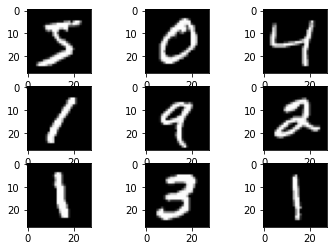

In [2]:
# load data
(trainX, trainY), (testX, testY) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [3]:
# load train and test dataset
# preprocessing of data
def load_dataset():

	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
 
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
 
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
 
	return trainX, trainY, testX, testY

In [4]:
# normalization of data

# scale pixels
def prep_pixels(train, test):

	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
 
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
  
	# return normalized images
	return train_norm, test_norm

In [13]:
# define CNN model
def define_model():

  # define model layers
	model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
	tf.keras.layers.MaxPooling2D((2, 2)),
	tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
	tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(10, activation='softmax')
  ])
 
	# compile model
	opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
	return model

In [6]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):

	scores, histories = list(), list()
 
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
 
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
   
		# define model
		model = define_model()
  
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
  
		# stores scores
		scores.append(acc)
		histories.append(history)
  
	return scores, histories

In [7]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):

	for i in range(len(histories)):
   
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  
	plt.show()

In [8]:
# summarize model performance
def summarize_performance(scores):

	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
 
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [9]:
# run the test harness for evaluating a model
def run_test_harness():

	# load dataset
	trainX, trainY, testX, testY = load_dataset()
 
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
 
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
 
	# learning curves
	summarize_diagnostics(histories)
 
	# summarize estimated performance
	summarize_performance(scores)

> 98.675
> 98.650
> 98.533
> 98.917
> 98.650


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


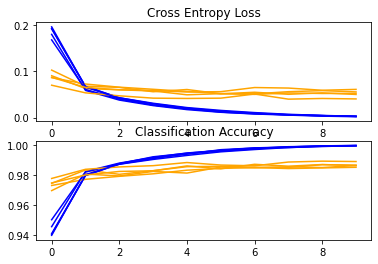

Accuracy: mean=98.685 std=0.126, n=5


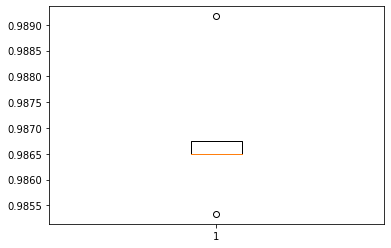

In [10]:
# Original model
run_test_harness()

> 98.567
> 98.692
> 98.600
> 98.800
> 98.633


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


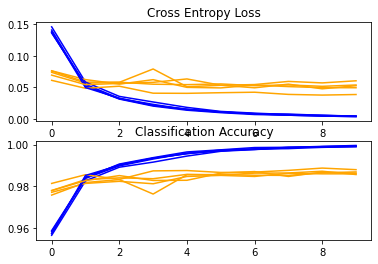

Accuracy: mean=98.658 std=0.082, n=5


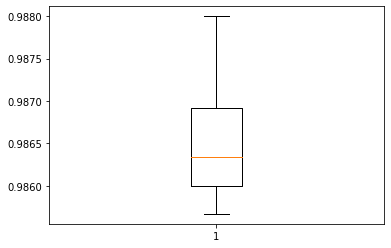

In [12]:
# batch normalization model
run_test_harness()

> 98.875
> 98.767
> 98.808
> 99.125
> 98.475


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


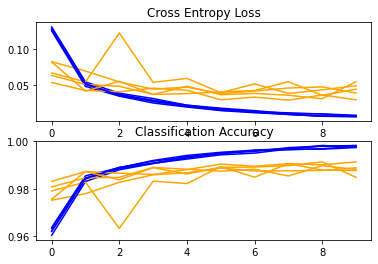

Accuracy: mean=98.810 std=0.209, n=5


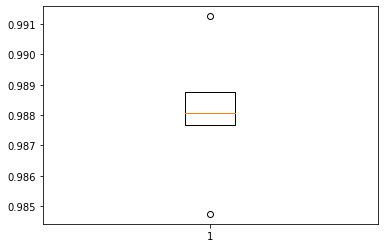

In [14]:
# model with increased depth
run_test_harness()

In [18]:
def run_test_harness_final():

	# load dataset
	trainX, trainY, testX, testY = load_dataset()
 
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
 
	# define model
	model = define_model()
 
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
 
	# save model
	model.save('final_model.h5')

In [19]:
# final model is deeper model
run_test_harness_final()

In [23]:
# run the test harness for evaluating a model

from keras.models import load_model

def run_test_harness_evaluate():
	
  # load dataset
	trainX, trainY, testX, testY = load_dataset()
	
  # prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	
  # load model
	model = load_model('final_model.h5')
	
  # evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

In [24]:
run_test_harness_evaluate()

> 99.240


In [30]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
# download sample image here: https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/sample_image.png
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	digit = model.predict_classes(img)
	print(digit[0])
 
# entry point
run_example()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


7
